In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('./Datset/Customer-Churn-Records.csv')

print(raw_data.shape)
df = raw_data.copy()
raw_data.head()

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<Axes: >

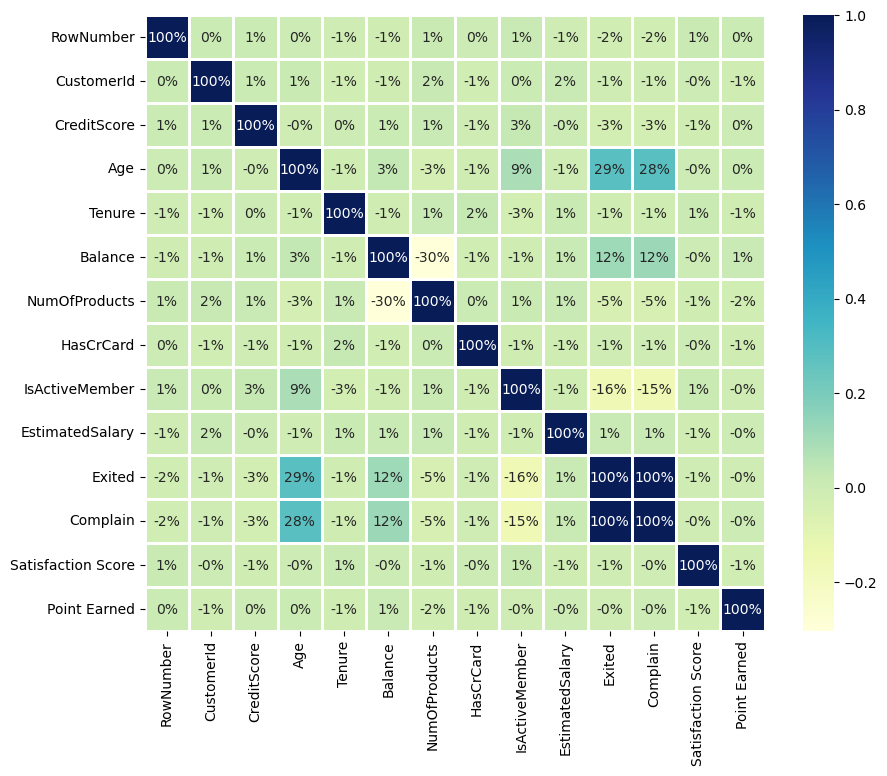

In [30]:
plt.figure(figsize=[10, 8])
sns.heatmap(data=df.corr(numeric_only=True) ,annot=True,fmt='.0%',lw=2,cmap='YlGnBu')

In [32]:
customer_id = df['CustomerId']
drop_feature = ['Surname','RowNumber']
df = df.drop(drop_feature, axis=1)

print(customer_id)

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64


In [34]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Customer Risk Score

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
corr = df.corr(numeric_only=True)['Exited']

In [53]:
col_features_minmax = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[col_features_minmax] = scaler.fit_transform(df[col_features_minmax])

df_scaled.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.25,DIAMOND,0.391600
1,15647311,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.50,DIAMOND,0.382520
2,15619304,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.50,DIAMOND,0.292849
3,15701354,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,1.00,GOLD,0.262202
4,15737888,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.00,GOLD,0.347333


In [108]:
risk_score = ((df_scaled['Age']*0.3) + (df_scaled['Balance']*0.1) + (df_scaled['IsActiveMember']*0.4) + (df_scaled['NumOfProducts']*0.2))*100
risk_score

0       49.729730
1       52.664639
2       29.426635
3       15.180180
4       55.137597
          ...    
9995    15.180180
9996    49.178462
9997    47.297297
9998    19.388660
9999     9.241132
Length: 10000, dtype: float64

In [110]:
df_scaled['Risk_Score'] = risk_score
df_scaled.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Risk_Score
0,15634602,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.25,DIAMOND,0.391600,49.729730
1,15647311,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.50,DIAMOND,0.382520,52.664639
2,15619304,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.50,DIAMOND,0.292849,29.426635
3,15701354,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,1.00,GOLD,0.262202,15.180180
4,15737888,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.00,GOLD,0.347333,55.137597


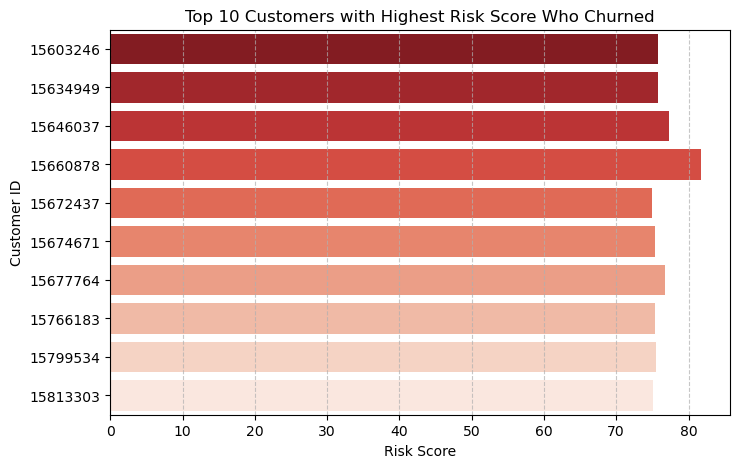

In [190]:
df_risk_score_all_geography = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Risk_Score'] >= 70)].sort_values(by='Risk_Score', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_risk_score_all_geography, x='Risk_Score', y='CustomerId', palette='Reds_r', orient='h')

plt.xlabel('Risk Score')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with Highest Risk Score Who Churned')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [231]:
df_risk_score_all_geography[['CustomerId','Geography','Risk_Score']]

,CustomerId,Geography,Risk_Score
6759,15660878,France,81.691665
1614,15646037,France,77.252252
9292,15677764,Germany,76.800487
2108,15634949,Germany,75.803630
2901,15603246,France,75.749257
8469,15799534,France,75.452347
7063,15766183,Germany,75.374912
7788,15674671,Spain,75.298223
2458,15813303,Spain,75.045045
5377,15672437,France,74.957212


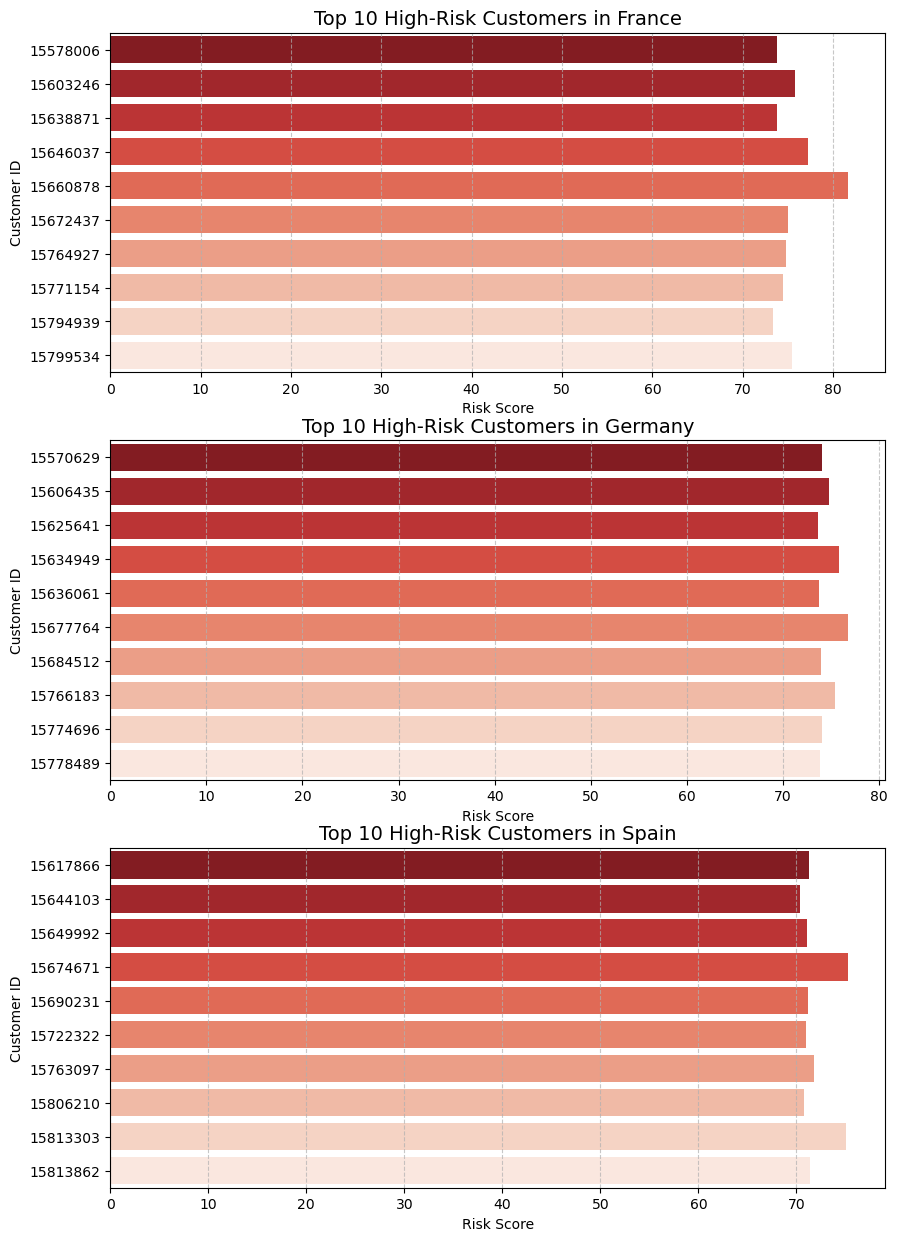

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

In [235]:
df_high_risk_split = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Risk_Score'] >= 70)]

df_top10_per_country = df_high_risk_split.groupby('Geography').apply(lambda x: x.nlargest(10, 'Risk_Score')).reset_index(drop=True)

countries = df_top10_per_country['Geography'].unique()
fig, axes = plt.subplots(nrows=len(countries), figsize=(10, 5 * len(countries)))

# กราฟแยกตามประเทศ
for ax, country in zip(axes, countries):
    plt.figure(figsize=(7,6))
    df_country = df_top10_per_country[df_top10_per_country['Geography'] == country]
    sns.barplot(data=df_country, x='Risk_Score', y='CustomerId', palette='Reds_r', orient='h', ax=ax)
    ax.set_title(f"Top 10 High-Risk Customers in {country}", fontsize=14)
    ax.set_xlabel("Risk Score")
    ax.set_ylabel("Customer ID")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [227]:
df_top10_per_country[['CustomerId','Geography','Risk_Score']]

,CustomerId,Geography,Risk_Score
0,15660878,France,81.691665
1,15646037,France,77.252252
2,15603246,France,75.749257
3,15799534,France,75.452347
4,15672437,France,74.957212
5,15764927,France,74.843134
6,15771154,France,74.453533
7,15578006,France,73.828829
8,15638871,France,73.811039
9,15794939,France,73.389839


# Customer Loyalty Score